# Project 2
### October 23, 2023
### Hilda Olivia Beltrán Acosta
### A01251916

## Simulation in class

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import statistics as st

In [2]:
tickmkt = "^MXX"
mxx = yf.download(tickers = tickmkt, start = "2000-01-01", interval = "1d")
mxx = mxx["Adj Close"]
mxx

[*********************100%%**********************]  1 of 1 completed


Date
2000-01-03     7077.709961
2000-01-04     6675.270020
2000-01-05     6764.310059
2000-01-06     6751.649902
2000-01-07     7047.089844
                  ...     
2023-10-17    49666.011719
2023-10-18    49274.781250
2023-10-19    48804.609375
2023-10-20    48275.910156
2023-10-23    48197.878906
Name: Adj Close, Length: 5979, dtype: float64

In [3]:
lnmxx = np.log(mxx)
N = len(lnmxx)
N

5979

In [4]:
phi0 = (lnmxx[-1] - lnmxx[0]) / N
phi0

0.00032085041151614795

In [5]:
sigma = np.std(lnmxx) / np.sqrt(N)
sigma

0.00950169304987283

In [6]:
#y0 = lnmxx[0]
y0 = 0.1
phi1 = 0.9
ysimln = np.zeros(N).tolist()

ysimln[0] = y0

for t in range(1, N):
    ysimln[t] = (phi0 + phi1 * ysimln[t - 1]) + np.random.normal(0, sigma)
    
ysim = np.exp(ysimln)
ysim

array([1.10517092, 1.08922683, 1.07011583, ..., 1.01389025, 1.01564843,
       1.01415719])

In [7]:
import matplotlib
from matplotlib.pyplot import *

ysim = pd.DataFrame(lnmxx)
ysim['ysimln'] = ysimln
ysim

,Adj Close,ysimln
Date,,
2000-01-03,8.864706,0.100000
2000-01-04,8.806165,0.085468
2000-01-05,8.819416,0.067767
2000-01-06,8.817542,0.068566
2000-01-07,8.860370,0.067406
...,...,...
2023-10-17,10.813076,0.008018
2023-10-18,10.805168,0.015060
2023-10-19,10.795580,0.013795


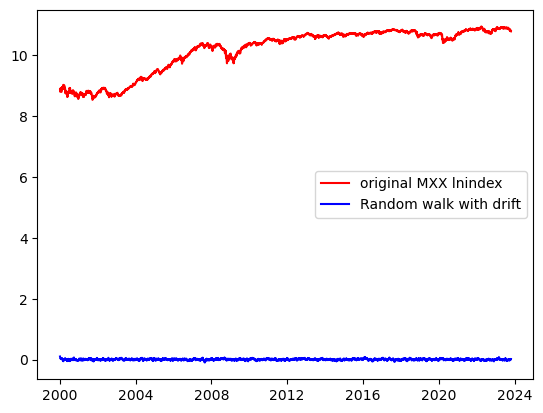

In [8]:
plot(ysim['Adj Close'], color = 'r')
plot(ysim['ysimln'], color = 'b')

legend(['original MXX lnindex', "Random walk with drift"])

show()

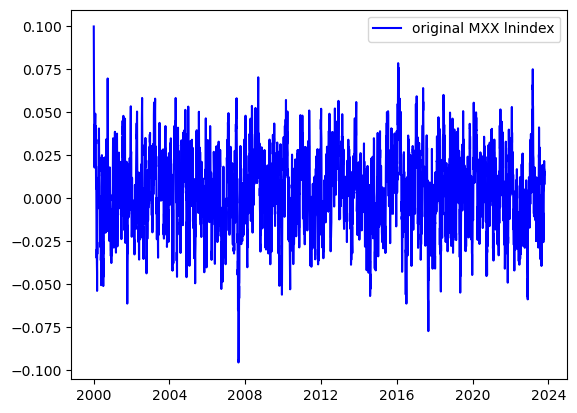

In [9]:
plot(ysim['ysimln'], color = 'b')

legend(['original MXX lnindex', "Random walk with drift"])

show()

## Project 2

### Part 2 - Forecasting Queretaro industrial activity

In [10]:
# Read Industrial Activity of Querétaro
qro = pd.read_csv('iaiqro.csv')

# Calculate the logarithm of iaiqro
# This is being used to make the data more stable and reduce variance
qro['lnqro'] = np.log(qro['iaiqro'])
qro

,Periodos,iaiqro,lnqro
0,2003/01,65.234491,4.177988
1,2003/02,64.750420,4.170540
2,2003/03,61.444991,4.118142
3,2003/04,64.953065,4.173665
4,2003/05,59.522348,4.086352
...,...,...,...
241,2023/02,89.168194,4.490524
242,2023/03,103.384331,4.638453
243,2023/04,91.876916,4.520450
244,2023/05,101.002534,4.615146


In [11]:
# Import the Augmented Dickey-Fuller test from statsmodels' api
from statsmodels.tsa.stattools import adfuller

# Run the test with the logarithm of iaiqro data
test = adfuller(qro['lnqro'])

# Obtain the t value and p value
t_val = test[0]
p_val = test[1]

print('t value:', t_val)
print('p value:', p_val)

t value: -2.0402700406367766
p value: 0.269199852269532


Our initial null hypothesis in this case is that our data is not stationary, for this we need to run a test, the Augmented Dickey-Fuller test. Our p-value has a value of 0.269, which means we can't reject the null hypothesis; since we need a 0.05 or smaller value for our p-value to accept the alternative hypothesis with a >95% confidence interval. Due to this results, we reject the alternative hypothesis and conclude our data is non-stationary.

In [12]:
# Calculate the annual difference of the logarithm of iaiqro data
# With which we're getting the seasonal differencing needed to make our series stationary
qro['y']= qro['lnqro']  - qro['lnqro'].shift(12)
qro.head(20)

,Periodos,iaiqro,lnqro,y
0,2003/01,65.234491,4.177988,NaN
1,2003/02,64.750420,4.170540,NaN
2,2003/03,61.444991,4.118142,NaN
3,2003/04,64.953065,4.173665,NaN
4,2003/05,59.522348,4.086352,NaN
5,2003/06,59.273040,4.082155,NaN
6,2003/07,59.521204,4.086333,NaN
7,2003/08,66.044043,4.190322,NaN
8,2003/09,76.448073,4.336612,NaN
9,2003/10,68.567827,4.227823,NaN


In [15]:
# When doing the analysis for the autocorrelation and partial autocorrelation function, we need a clean dataset, 
# without NaN values, so we decide to make a copy of the dataframe and drop this NaN values
qro_acf = qro.copy().dropna()
qro_acf

,Periodos,iaiqro,lnqro,y
12,2004/01,66.045678,4.190347,0.012358
13,2004/02,65.668412,4.184618,0.014078
14,2004/03,65.394662,4.180441,0.062298
15,2004/04,66.930978,4.203662,0.029997
16,2004/05,61.722965,4.122656,0.036304
...,...,...,...,...
241,2023/02,89.168194,4.490524,0.014323
242,2023/03,103.384331,4.638453,0.044631
243,2023/04,91.876916,4.520450,-0.023967
244,2023/05,101.002534,4.615146,0.028219


In [16]:
# We run the test again with this seasonal differencing
test = adfuller(qro_acf['y'])

t_val = test[0]
p_val = test[1]

print('t value:', t_val)
print('p value:', p_val)

t value: -3.3992926592455004
p value: 0.010983008452611681


We can see that our p-value is lower than 0.05, meaning we can now reject the null hypothesis and conclude our series is now stationary. This was achieved by adding a Seasonal Integration Order to the data, meaning we have to take into consideration that we have a D = 1 for our model.

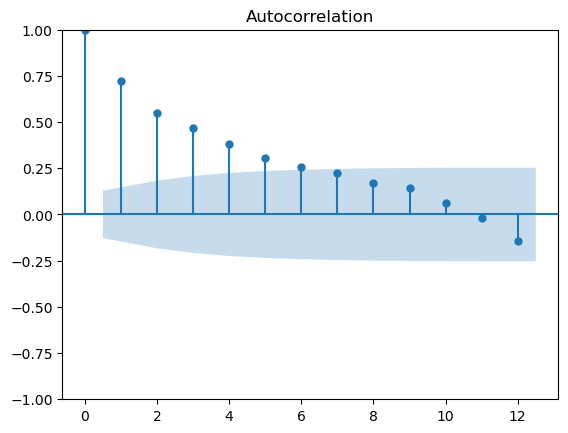

In [17]:
# Autocorrelation plot, 12 lags to see how it behaves with the other months of the year
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(qro_acf.y, lags = 12)
plt.show()

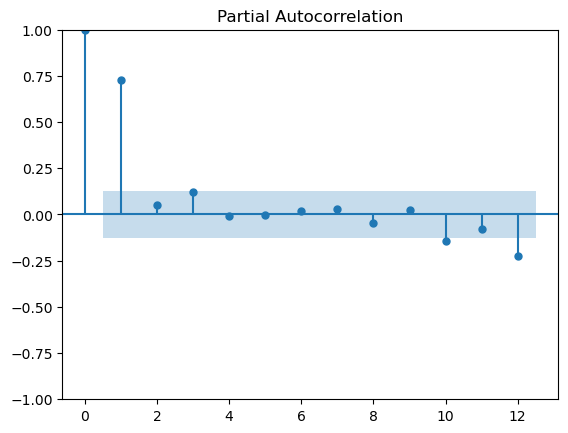

In [19]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")


from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(qro_acf.y, lags=12)
plt.show()

We can observe a significant influence to the current month with the last month. Meaning lag 11 has an impact in lag 12. We can conclude there's a relation between the current and one before, meaning we set p as 1; p being the autoregressive order.

In [51]:
import statsmodels.api as sm

p = 1; d = 0; q = 0; P = 0; D = 1; Q = 0; s = 12

model = sm.tsa.statespace.SARIMAX(qro_acf['lnqro'], order=(p,d,q), seasonal_order = (P,D,Q,12), trend='c')
fit_model = model.fit(disp = 0, method='bfgs')

In [52]:
print(fit_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              lnqro   No. Observations:                  234
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                 313.098
Date:                            Mon, 23 Oct 2023   AIC                           -620.196
Time:                                    22:58:36   BIC                           -609.988
Sample:                                         0   HQIC                          -616.074
                                            - 234                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0053      0.004      1.355      0.175      -0.002       0.013
ar.L1          0.7241      0.035   

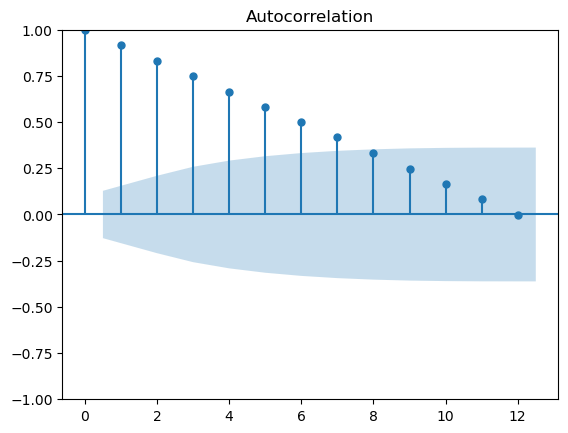

In [62]:
plot_acf(fit_model.resid, lags = 12)
plt.show()

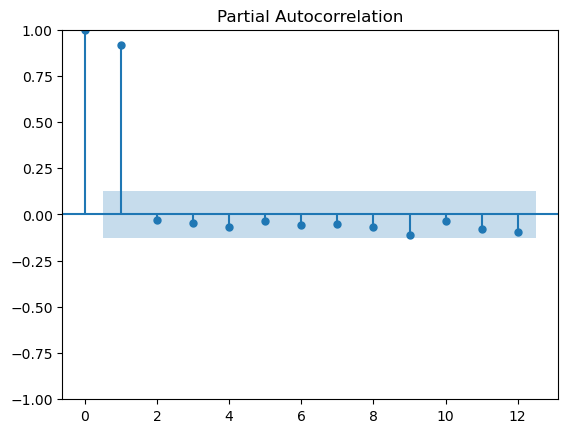

In [63]:
plot_pacf(fit_model.resid, lags = 12)
plt.show()

We can observe the autocorrelation and the partial autocorrelation functions plot is better for this model. Even though there's a high correlation in lag 1, for which we can use a q=1. With this, we are using one lagged forecasted error in the model. 

In [68]:
p = 1; d = 0; q = 1; P = 0; D = 1; Q = 0; s = 12

model1 = sm.tsa.statespace.SARIMAX(qro_acf['lnqro'], order=(p,d,q), seasonal_order = (P,D,Q,12), trend='c', simple_differencing = True)
fit_model1 = model1.fit(disp = 0, method='bfgs')

In [69]:
print(fit_model1.summary())

                                      SARIMAX Results                                      
Dep. Variable:                          DS12.lnqro   No. Observations:                  222
Model:             SARIMAX(1, 0, 1)x(0, 0, [], 12)   Log Likelihood                 313.259
Date:                             Mon, 23 Oct 2023   AIC                           -618.519
Time:                                     23:16:14   BIC                           -604.908
Sample:                                          0   HQIC                          -613.024
                                             - 222                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0048      0.004      1.293      0.196      -0.002       0.012
ar.L1          0.7540      

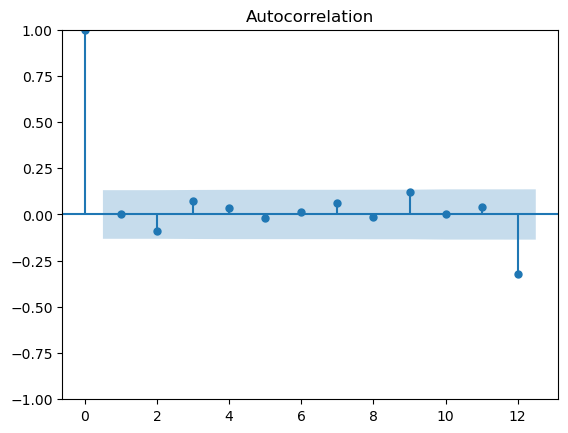

In [72]:
plot_acf(fit_model1.resid, lags = 12)
plt.show()

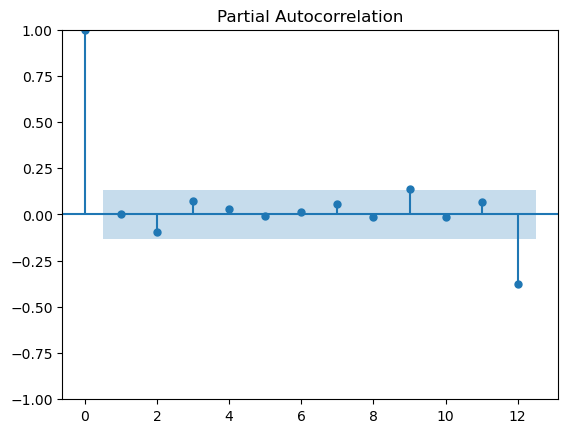

In [73]:
plot_pacf(fit_model1.resid, lags = 12)
plt.show()

We can see the lag 1 partial autocorrelation has been reduced significantly, even though we now have a higher value in lag 12. So we need to add a Q=1 in our model, to use one lag of seasonal forecast error for the model.

In [74]:
p = 1; d = 0; q = 1; P = 0; D = 1; Q = 1; s = 12

last = sm.tsa.statespace.SARIMAX(qro_acf['lnqro'], order=(p,d,q), seasonal_order = (P,D,Q,12), trend='c', simple_differencing = True)
fit_last = last.fit(disp = 0, method='bfgs')

In [75]:
print(fit_last.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         DS12.lnqro   No. Observations:                  222
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 12)   Log Likelihood                 338.774
Date:                            Mon, 23 Oct 2023   AIC                           -667.549
Time:                                    23:17:25   BIC                           -650.535
Sample:                                         0   HQIC                          -660.680
                                            - 222                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0029      0.002      1.766      0.077      -0.000       0.006
ar.L1          0.8370      0.050   

### Intercept
The intercept is the constant term in the model. In this case, it's approximately 0.0029. However, the p-value (0.077) suggests that it's not statistically significant at a typical significance level of 0.05.

### Auto Regressive Term
The autoregressive term (ar.L1) with an estimate of 0.8370 indicates that the current value of the time series is positively correlated with the value from the previous period (lag 1). This coefficient is highly statistically significant (p-value < 0.001).

### Moving Average Term
The moving average term (ma.L1) with an estimate of -0.1681 suggests that the current error term is negatively correlated with the error term from the previous period (lag 1). This coefficient is statistically significant (p-value = 0.044).

### Seasonal Moving Average Term
The seasonal moving average term (ma.S.L12) with an estimate of -0.5851 indicates a seasonal dependency with a lag of 12. This term represents the relationship between the error at the current time point and the error at the same time point in the previous seasonal cycle. This coefficient is highly statistically significant (p-value < 0.001).

### Residual Standard Error
The residual standard error is an estimate of the standard deviation of the error term. In this case, it's approximately 0.0027.

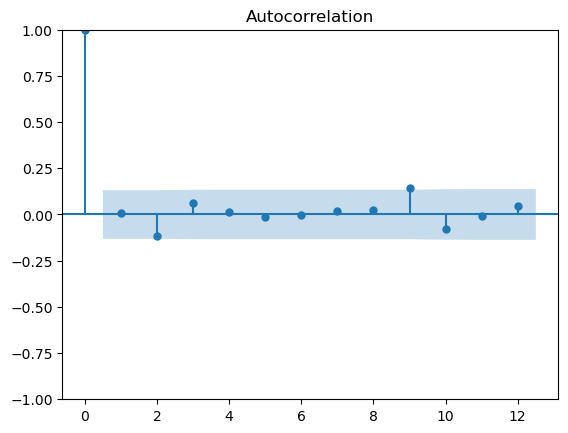

In [76]:
plot_acf(fit_last.resid, lags = 12)
plt.show()

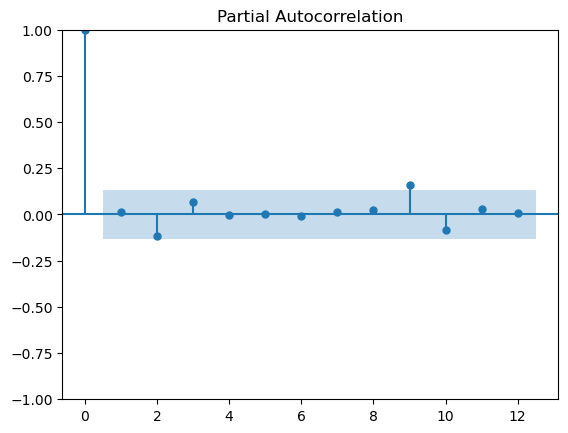

In [77]:
plot_pacf(fit_last.resid, lags = 12)
plt.show()

We can see the partial autocorrelation from each lag is inside the 95% confidence interval, except for the lag 9. We can assume lag 9 is not relevant for the model, since in reality is really hard that this lag provides significant explanation for the results.

## Generate new registers in the DataFrame, for forecasting

In [43]:
date_strings = []

for year in range(2024, 2031):
    for month in range(1, 13):
        date_strings.append(f'{year}/{month:02d}')

data = {'Periodos': date_strings, 'Prediction': [np.nan] * len(date_strings)}
data = pd.DataFrame(data)
final = pd.concat([qro, data], ignore_index=True)
final

,Periodos,iaiqro,lnqro,y,Prediction
0,2003/01,65.234491,4.177988,NaN,NaN
1,2003/02,64.750420,4.170540,NaN,NaN
2,2003/03,61.444991,4.118142,NaN,NaN
3,2003/04,64.953065,4.173665,NaN,NaN
4,2003/05,59.522348,4.086352,NaN,NaN
...,...,...,...,...,...
325,2030/08,NaN,NaN,NaN,NaN
326,2030/09,NaN,NaN,NaN,NaN
327,2030/10,NaN,NaN,NaN,NaN
328,2030/11,NaN,NaN,NaN,NaN


Get the forecasted values for the next 96 values, meaning till the last month of the year 2030. Transform the DataFrame structure to visualize the results better.

In [44]:
predictions = fit_last.get_forecast(steps = 96)
final['Prediction'] = predictions.predicted_mean

In [45]:
final = final.set_index(['Periodos'], drop=True)

In [46]:
final.drop('y', axis = 1, inplace = True)

In [47]:
final.drop('iaiqro', axis = 1, inplace = True)
final

,lnqro,Prediction
Periodos,,
2003/01,4.177988,NaN
2003/02,4.170540,NaN
2003/03,4.118142,NaN
2003/04,4.173665,NaN
2003/05,4.086352,NaN
...,...,...
2030/08,NaN,4.660931
2030/09,NaN,4.773036
2030/10,NaN,4.667459


We can see in the next graph the expected industrial index for Querétaro in the next 6 years. The expected behaviour is for it to grow as time passes.

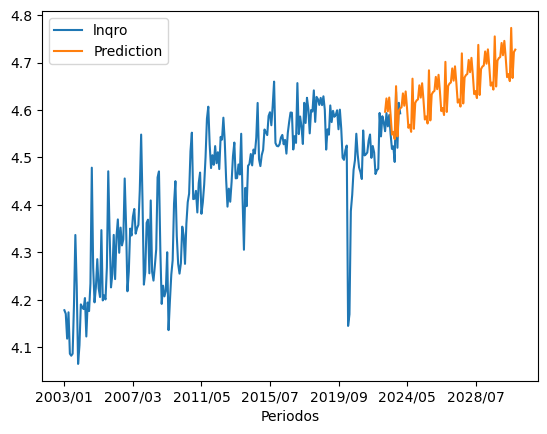

In [48]:
final.plot()
show()